# Fitting a geothermal gradient - A first (linear) inverse problem

You may not realize it, but you are actually sitting on top of a 2.5 km deep geothermal borehole: the RWTH-1.

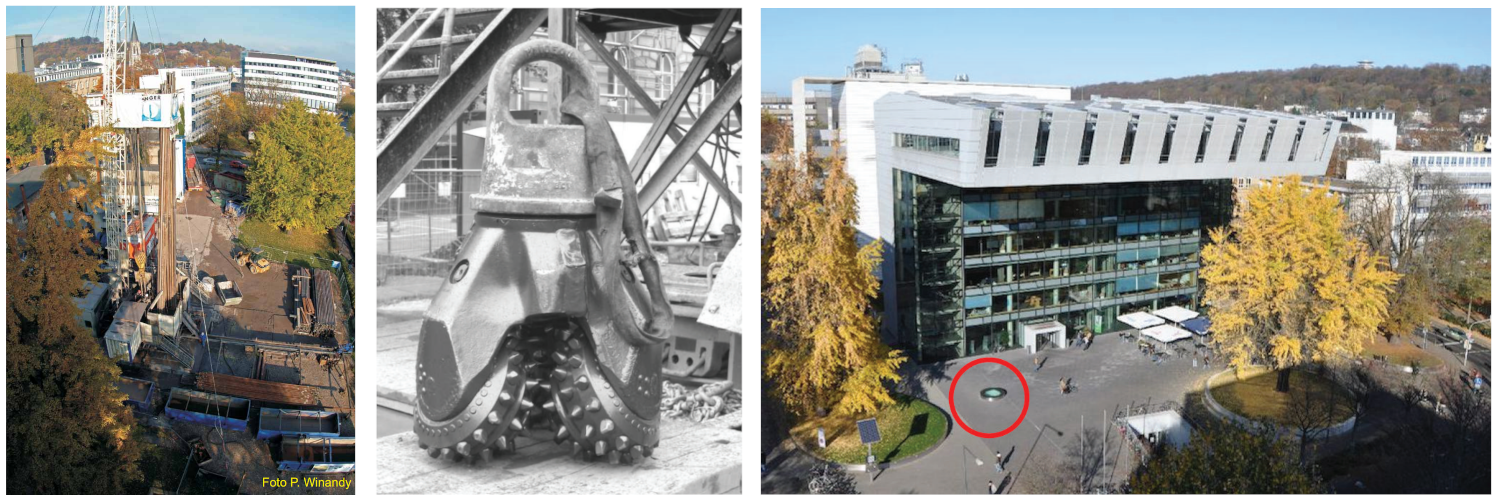
*Pictures from [Kukla et al. (2007)](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.702.1073&rep=rep1&type=pdf) and [Dijkshoorn et al. (2013)](https://downloads.hindawi.com/journals/ijge/2013/916541.pdf).*

Let's have a look at the recorded temperatures from April 2005, shortly after finalization of the drilling campaign, and June 2006.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")

apr05 = pd.read_csv("data/temp_rwth-1_apr2005.csv")
jun06 = pd.read_csv("data/temp_rwth-1_jun2006.csv")

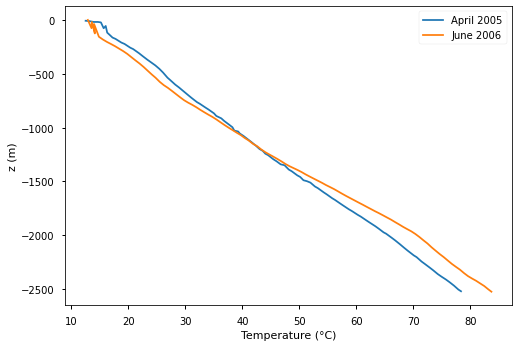

In [11]:
plt.plot(apr05["T (°C)"], apr05["z (m)"], label="April 2005")
plt.plot(jun06["T (°C)"], jun06["z (m)"], label="June 2006")
plt.xlabel("Temperature (°C)")
plt.ylabel("z (m)")
plt.legend()

The effect of the drilling fluid, cooling the lower part and heating the upper part of the well, is clearly visible. Let's start by estimating the geothermal gradient before drilling.

## The "forward problem"

Before we can can estimate parameters, we need a model to describe our observations. For the sake of simplicity, we start with a linear model here:

$$T(z) = m_1 \cdot z + m_2$$

The forward problem needs to be transferred to our notation $\mathbf{d}=\mathbf{G}\mathbf{m}$.

  $$\begin{bmatrix}d_1 \\ d_2 \\ \vdots \\ d_N \end{bmatrix} = \begin{bmatrix}z_1 & 1 \\ z_2 & 1 \\ \vdots & \vdots \\ z_N & 1 \end{bmatrix}\begin{bmatrix}m_1 \\ m_2 \end{bmatrix}$$

  $$\mathbf{d}\qquad = \qquad\mathbf{G}\qquad\qquad \underbrace{\mathbf{m}}_{M=2}$$

In [57]:
data_set = apr05
d = data_set["T (°C)"]
z = data_set["z (m)"]

In [58]:
G = np.ones((len(d),2))
G[:,0] = z
G.shape

(96, 2)

## The "inverse problem"

The type of inverse problem is related to the number of parameters and measurements (i.e., to the dimensions of the $\mathbf{G}$ matrix). Since we have 96 measurements and two parameters, the problem is over-determined. We can thus apply the least-squares solution.

$$\mathbf{m}_\mathrm{est}=\left[\mathbf{G}^T\mathbf{G}\right]^{-1} \mathbf{G}^T\mathbf{d}$$

In [68]:
m_est = np.linalg.inv(G.T @ G) @ G.T @ d
print(f"The average geothermal gradient is {-m_est[0]:.3f} degrees per meter.")

The average geothermal gradient is 0.026 degrees per meter.


*Note that the @-operator performs the dot product, whereas the * operator performs element-wise multiplication.*

The predicted data, i.e. the model response, can be computed by solving the forward problem with the estimated parameters.

 $\mathbf{d}_\mathsf{pre}=\mathbf{G}\mathbf{m}_\mathsf{est}$

In [69]:
d_pre = G @ m_est

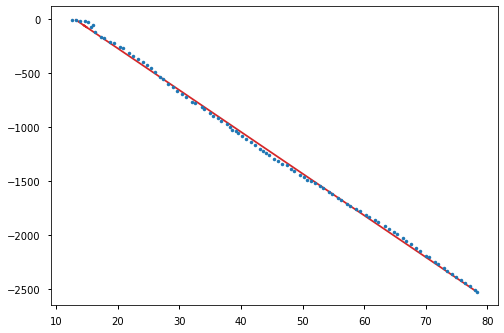

In [70]:
plt.plot(d_pre, z, '-', color="tab:red")
plt.plot(d, z, '.', color="tab:blue")

<div class="alert alert-info" role="alert">
    <h5>Question:</h5>
    By how many degrees per meter was the geothermal gradient disturbed?
</div>